In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import unidecode

import pickle
import pyLDAvis.sklearn
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

import string
import re
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
pd.set_option('display.max_rows',None)

#  Importing data

In [3]:
!pip install openpyxl

In [157]:
df = pd.read_excel('data.xlsx', engine='openpyxl')

In [158]:
df.head()

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
0,ReddSab,b'@deirbhilesdaddy @superbowler4 mine was just...,no retweet username,[],2021-12-01 08:59:58+00:00,666,1216,en
1,BobStPier1,b'breaking: document dump on pfizer\xe2\x80\x9...,MaajidNawaz,[],2021-12-01 08:59:57+00:00,1964,2028,en
2,SamLowry60,b'some very good preliminary news:\n\n\xe2\x80...,matthewlesh,[],2021-12-01 08:59:42+00:00,902,1982,en
3,Key2MiddleEast,"b""the pfizer vaccine is likely to offer strong...",SkyNews,[],2021-12-01 08:59:41+00:00,1077,5002,en
4,kk002188,"b'@fltltanoopverma correct, sa is getting fram...",no retweet username,[],2021-12-01 08:59:41+00:00,11,113,en


In [159]:
df.shape

(2111, 8)

Removing above unwanted records from the data

In [160]:
df[df['username']=='username']

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
29,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
104,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
163,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
164,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
232,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
256,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
333,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
412,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
468,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
559,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language


In [161]:
df = df[df['username']!='username'].reset_index(drop=True)
df.shape

(2074, 8)

# Checking missing values

In [162]:
df.isnull().sum()

username                 0
tweet                    0
username_of_retweeter    0
hashtag                  0
tweet created            0
number of followers      0
# following              0
language                 0
dtype: int64

There are empty hashtags

In [163]:
df[df['hashtag']=='[]'].sample(3)

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
226,NickytaLeb,"b""@laurie_garrett @pfizer @scottgottliebmd it'...",georgimarinov,[],2021-12-01 08:50:01+00:00,2060,954,en
616,gfields1976,b'not a real vaccine then is it?\nhttps://t.co...,goddersbloom,[],2021-03-01 08:46:39+00:00,73,386,en
239,Allchanges,"b'please take the survey titled ""survey of hea...",ahmedaftab68,[],2021-02-01 08:58:16+00:00,6609,7190,en


And when scraping, if the username of retweeter	is empty, we would show 'no retweet username' like the following

In [164]:
df[df['username_of_retweeter']=='no retweet username'].sample(3)

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
1167,Suzzanne1313,"b""apologies 2the tools for comparing them to #...",no retweet username,"[{'text': 'MattCanavan', 'indices': [43, 55]}]",2021-07-01 08:30:21+00:00,2923,4999,en
1618,GreenUrb,b'22 year old dies just 9 hours after #pfizerv...,no retweet username,"[{'text': 'PfizerVaccine', 'indices': [36, 50]}]",2021-09-29 21:21:00+00:00,505,448,en
659,HealthBuzzBE,b'\xf0\x9f\x8c\x9f buzzing in the belgian heal...,no retweet username,[],2021-04-01 08:58:06+00:00,1576,3047,en


In [165]:
for col in df.columns:
    try:
        print(col,"--",df[df[col]=='NULL'].shape[0]+df[df[col]=='[]'].shape[0]+df[df[col]=='no retweet username'].shape[0])
        print("")
    except:pass

username -- 0

tweet -- 0

username_of_retweeter -- 818

hashtag -- 1305

tweet created -- 0

number of followers -- 0

# following -- 0

language -- 0



- Replacing null with unknown

In [166]:
df['username_of_retweeter'] = df['username_of_retweeter'].replace(['no retweet username','Unknown'])
df['hashtag'] = df['hashtag'].replace(['[]','Unknown'])

In [167]:
for col in df.columns:
    try:
        print(col,"--",df[df[col]=='NULL'].shape[0]+df[df[col]=='[]'].shape[0]+df[df[col]=='no retweet username'].shape[0])
        print("")
    except:pass

username -- 0

tweet -- 0

username_of_retweeter -- 1

hashtag -- 8

tweet created -- 0

number of followers -- 0

# following -- 0

language -- 0



In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   username               2074 non-null   object
 1   tweet                  2074 non-null   object
 2   username_of_retweeter  2074 non-null   object
 3   hashtag                2074 non-null   object
 4   tweet created          2074 non-null   object
 5   number of followers    2074 non-null   object
 6   # following            2074 non-null   object
 7   language               2074 non-null   object
dtypes: object(8)
memory usage: 129.8+ KB


In [169]:
df['number of followers'] = df['number of followers'].astype(int)
df['# following'] = df['# following'].astype(int)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   username               2074 non-null   object
 1   tweet                  2074 non-null   object
 2   username_of_retweeter  2074 non-null   object
 3   hashtag                2074 non-null   object
 4   tweet created          2074 non-null   object
 5   number of followers    2074 non-null   int32 
 6   # following            2074 non-null   int32 
 7   language               2074 non-null   object
dtypes: int32(2), object(6)
memory usage: 113.5+ KB


In [171]:
df['tweet'].head().values

array(["b'@deirbhilesdaddy @superbowler4 mine was just recorded,  i got the pfizer booster,  nurse said the card was only for the first 2 vaccines.'",
       "b'breaking: document dump on pfizer\\xe2\\x80\\x99s \\xe2\\x80\\x9cfalsified data\\xe2\\x80\\x9d scandal (as originally reported by the british medical journal here https://t.co/xnwlsrtxi1)\\n\\nhave you ever wondered why this isn\\xe2\\x80\\x99t on your front pages? https://t.co/tjpfb1mdad'",
       "b'some very good preliminary news:\\n\\n\\xe2\\x80\\x9cpfizer vaccine is just slightly less effective in preventing infection with omicron than with delta \\xe2\\x80\\x93 90% as opposed to 95% \\xe2\\x80\\x93 while it is as effective \\xe2\\x80\\x93 around 93% \\xe2\\x80\\x93 in preventing serious symptoms\\xe2\\x80\\xa6 with a booster. https://t.co/1gpbz2gazp'",
       'b"the pfizer vaccine is likely to offer strong protection against any severe disease from the new omicron covid variant, according to the head of biontech who urged

In [172]:
df['username'] = df['username'].str.lower()
df['username_of_retweeter'] = df['username_of_retweeter'].str.lower()

# Cleaning tweets

# 1. Name removal

In [173]:
users = list(set(list(df['username'].unique())+list(df['username_of_retweeter'].unique())))
print('No. of users: ',len(users))

No. of users:  2011


In [174]:
#removing name starts with '@' and word starts with 'x'
df['tweet'] = [re.sub("(@[A-Za-z0-9]+)|(x[A-Za-z0-9]+)","",i).strip() for i in df['tweet']]
df['tweet'].head(3).values

array(["b'  mine was just recorded,  i got the pfizer booster,  nurse said the card was only for the first 2 vaccines.'",
       "b'breaking: document dump on pfizer\\\\\\ \\\\\\ data\\\\\\ scandal (as originally reported by the british medical journal here https://t.co/)\\n\\nhave you ever wondered why this isn\\\\\\ on your front pages? https://t.co/tjpfb1mdad'",
       "b'some very good preliminary news:\\n\\n\\\\\\ vaccine is just slightly less effective in preventing infection with omicron than with delta \\\\\\ 90% as opposed to 95% \\\\\\ while it is as effective \\\\\\ around 93% \\\\\\ in preventing serious symptoms\\\\\\ with a booster. https://t.co/1gpbz2gazp'"],
      dtype=object)

# 2. emoji, links cleaning

In [175]:
def characters_removal(text):
    text = unidecode.unidecode(text)
    return text.strip()
df["tweet"] = df["tweet"].apply(lambda text: characters_removal(text))

def n_remove(text):
    text = re.sub(r'\\n','',text)
    return text
df["tweet"] = df["tweet"].apply(lambda text: n_remove(text))

In [176]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
 
    return text

df["tweet"] = df["tweet"].apply(lambda text: clean_text(text))

In [177]:
df['tweet'].head(3).values

array(['b   mine was just recorded   i got the pfizer booster   nurse said the card was only for the first  vaccines  ',
       'b breaking  document dump on pfizer        data    scandal  as originally reported by the british medical journal here  you ever wondered why this isn    on your front pages  ',
       'b some very good preliminary news     vaccine is just slightly less effective in preventing infection with omicron than with delta       as opposed to       while it is as effective     around       in preventing serious symptoms    with a booster  '],
      dtype=object)

# 3. Punctuation removal

In [178]:
PUNCT_REMOVE = string.punctuation
def remove_punctuation(text):

    return text.translate(str.maketrans('', '', PUNCT_REMOVE))


df["tweet"] = df["tweet"].apply(lambda text: remove_punctuation(text))

In [179]:
df['tweet'].head(3).values

array(['b   mine was just recorded   i got the pfizer booster   nurse said the card was only for the first  vaccines  ',
       'b breaking  document dump on pfizer        data    scandal  as originally reported by the british medical journal here  you ever wondered why this isn    on your front pages  ',
       'b some very good preliminary news     vaccine is just slightly less effective in preventing infection with omicron than with delta       as opposed to       while it is as effective     around       in preventing serious symptoms    with a booster  '],
      dtype=object)

# 4. Stopwords

In [180]:
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    
    return " ".join([word for word in str(text).split() if word not in STOPWORDS]).strip()


df["tweet"] = df["tweet"].apply(lambda text: remove_stopwords(text))

In [181]:
df['tweet'].head(3).values

array(['b mine recorded got pfizer booster nurse said card first vaccines',
       'b breaking document dump pfizer data scandal originally reported british medical journal ever wondered front pages',
       'b good preliminary news vaccine slightly less effective preventing infection omicron delta opposed effective around preventing serious symptoms booster'],
      dtype=object)

In [182]:
def remove_newlines_tabs(text):
    Formatted_text = str(text).replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text

df["tweet"] = df["tweet"].apply(lambda text: remove_newlines_tabs(text))

def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text

df["tweet"] = df["tweet"].apply(lambda text: remove_whitespace(text))

In [183]:
df['tweet'].head(3).values

array(['b mine recorded got pfizer booster nurse said card first vaccines',
       'b breaking document dump pfizer data scandal originally reported british medical journal ever wondered front pages',
       'b good preliminary news vaccine slightly less effective preventing infection omicron delta opposed effective around preventing serious symptoms booster'],
      dtype=object)

In [185]:
for i in range(len(df)):
    df['tweet'][i] = df['tweet'][i][1:]
df['tweet'].head()

0     mine recorded got pfizer booster nurse said c...
1     breaking document dump pfizer data scandal or...
2     good preliminary news vaccine slightly less e...
3     pfizer vaccine likely offer strong protection...
4     correct sa getting framed days earlier sa ask...
Name: tweet, dtype: object

In [187]:
df.head()

,username,tweet,username_of_retweeter,hashtag,tweet created,number of followers,# following,language
0,reddsab,mine recorded got pfizer booster nurse said c...,no retweet username,[],2021-12-01 08:59:58+00:00,666,1216,en
1,bobstpier1,breaking document dump pfizer data scandal or...,maajidnawaz,[],2021-12-01 08:59:57+00:00,1964,2028,en
2,samlowry60,good preliminary news vaccine slightly less e...,matthewlesh,[],2021-12-01 08:59:42+00:00,902,1982,en
3,key2middleeast,pfizer vaccine likely offer strong protection...,skynews,[],2021-12-01 08:59:41+00:00,1077,5002,en
4,kk002188,correct sa getting framed days earlier sa ask...,skynews,[],2021-12-01 08:59:41+00:00,11,113,en


# Polarity score

In [188]:
from textblob import TextBlob

df["Polarity"] = df["tweet"].apply(lambda text: TextBlob(text).sentiment.polarity)

DO THIS PART FIRST:
- You are going to scrape more data rom the year 2017. 
- You will download the csv files automatically. Convert these files to excel using the extension.
- Add these files to the EDA folder.
- Upload the files to Jupyter. 
- Run of all the cells in this notebook from the beginning.


- DO THIS PART SECOND
- Select only those usernames with more than 500,000 followers
- Add those users to a list to analyze
- Check the amount of tweets made by each username in this list
- Look at tweets made by each of these users. Read these tweets and understand whether or not they are written by people who may have bipolar diorder
- Choose a select number of tweets to remove from the df['tweets'] column according to each username in the list (this number should be the same for each username)
- Make sure that when you remove these tweets, these changes are saved to the dataframe.
- Continue to run Arvina's cells below but do not run those cells until you are finished with the steps above
- Once finished with the steps above. Please message the group
- Save this Jupyter notebook (download the notebook). And send to the group. 
- Send the data you've collected as well. 

In [189]:
def getAnalysis(score):
    if score < 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

df["Polarity_distribution"] = df["Polarity"].apply(lambda score: getAnalysis(score))

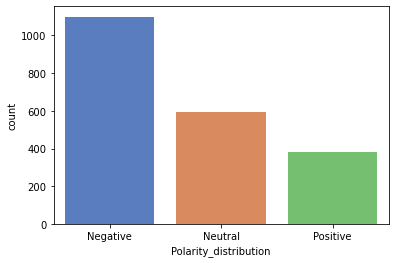

In [190]:
sns.countplot(data=df,x=df['Polarity_distribution'],palette='muted');

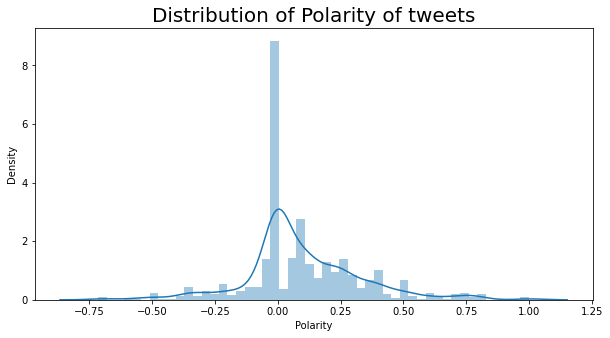

In [191]:
plt.figure(figsize=(10,5))
sns.distplot(df['Polarity']);
plt.title('Distribution of Polarity of tweets', fontsize=20);

In [192]:
df['Polarity'].describe()

count    2074.000000
mean        0.098017
std         0.232949
min        -0.714286
25%         0.000000
50%         0.050000
75%         0.217235
max         1.000000
Name: Polarity, dtype: float64

In [193]:
print("mean: ",df['Polarity'].mean())
print("median: ",df['Polarity'].median())
print("Skewness: ",df['Polarity'].skew(skipna=True))

mean:  0.09801663034811454
median:  0.05
Skewness:  0.45004032464402693


- Seems like normally distributed but less right skewed since "mean>median>mode"

# EDA

In [212]:
stopwords = set(STOPWORDS)
stopwords.update(['br', 'href','like','one','got','use','med','ago','yrs','pfizer'])
textt = " ".join(review for review in df.tweet)

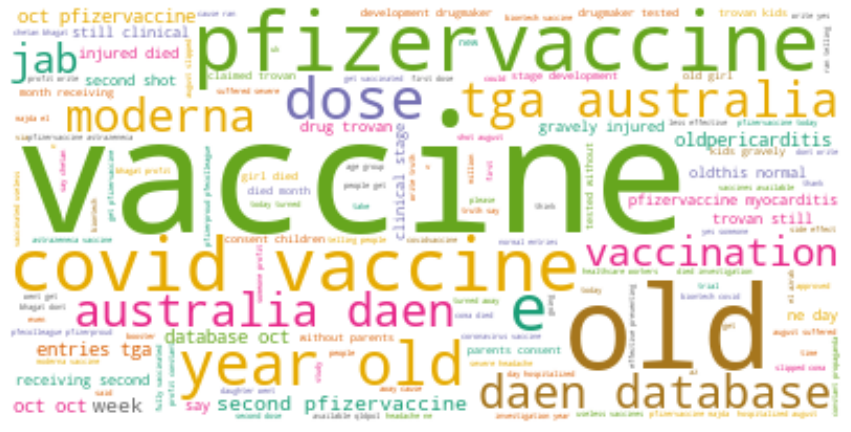

In [213]:
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      colormap='Dark2').generate(textt)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [197]:
#unwanted words removal
df['tweet'] = df['tweet'].str.replace('iaeur','')
df['tweet'] = df['tweet'].str.replace('itaeur','')

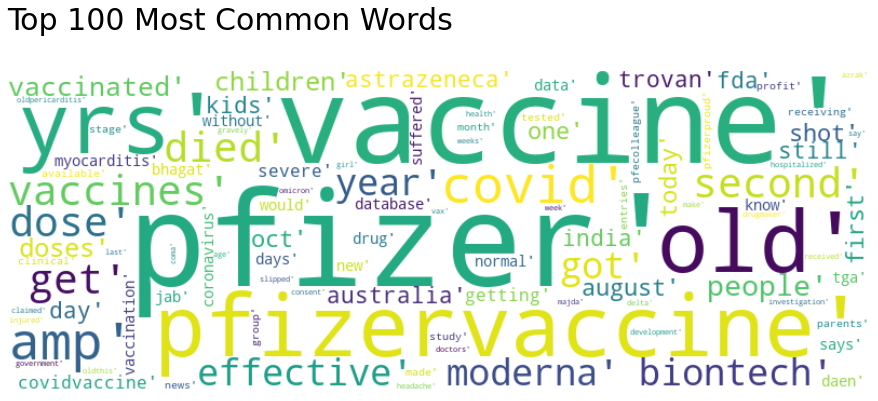

In [198]:
words = [i.split() for i in df['tweet']]
allwords = []
for wordlist in words:
    for word in wordlist:
        if len(word)>2 and word!='like':
            allwords.append(word)

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=800,stopwords=stopwords, height=300, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(12,8), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words \n', fontsize=30,loc='left')
plt.tight_layout(pad=0)
plt.show()

In [199]:
mostcommon

[('pfizer', 1384),
 ('vaccine', 1138),
 ('pfizervaccine', 868),
 ('old', 438),
 ('yrs', 436),
 ('covid', 369),
 ('amp', 321),
 ('vaccines', 268),
 ('get', 220),
 ('dose', 213),
 ('second', 210),
 ('died', 188),
 ('year', 180),
 ('got', 159),
 ('moderna', 149),
 ('effective', 147),
 ('biontech', 145),
 ('people', 143),
 ('vaccinated', 141),
 ('children', 141),
 ('doses', 141),
 ('august', 134),
 ('shot', 127),
 ('oct', 126),
 ('one', 123),
 ('first', 122),
 ('today', 118),
 ('astrazeneca', 117),
 ('trovan', 110),
 ('fda', 108),
 ('india', 108),
 ('day', 107),
 ('australia', 105),
 ('kids', 101),
 ('still', 100),
 ('getting', 99),
 ('severe', 97),
 ('covidvaccine', 96),
 ('myocarditis', 93),
 ('new', 90),
 ('data', 89),
 ('tga', 88),
 ('jab', 82),
 ('vaccination', 81),
 ('says', 80),
 ('database', 80),
 ('daen', 79),
 ('days', 78),
 ('would', 78),
 ('know', 77),
 ('drug', 77),
 ('bhagat', 77),
 ('coronavirus', 76),
 ('normal', 76),
 ('without', 74),
 ('suffered', 73),
 ('receiving', 71),

In [200]:
print("Total No. of Unique words in the tweet: ",len(FreqDist(allwords)))

Total No. of Unique words in the tweet:  4578


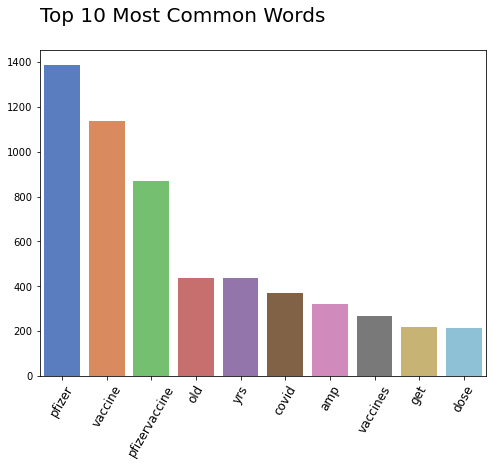

In [201]:
mostcommon_words = {i:j for i,j in mostcommon[:10]}
plt.figure(figsize=(8,6))
sns.barplot(x=list(mostcommon_words.keys()),
            y=list(mostcommon_words.values()),palette='muted');
plt.xticks(rotation=60, fontsize=12);
plt.title('Top 10 Most Common Words \n', fontsize=20,loc='left');

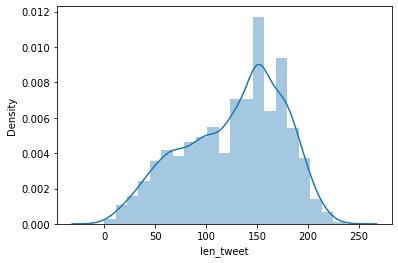

In [202]:
df['len_tweet'] = [len(i) for i in df['tweet']]
sns.distplot(df['len_tweet']);

In [203]:
df['len_tweet'].describe()

count    2074.000000
mean      127.418033
std        48.162435
min         0.000000
25%        92.000000
50%       135.000000
75%       165.000000
max       236.000000
Name: len_tweet, dtype: float64

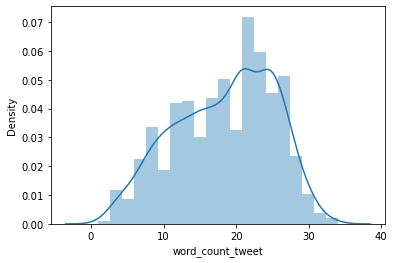

In [204]:
df['word_count_tweet'] = [len(i.split(" ")) for i in df['tweet']]
sns.distplot(df['word_count_tweet']);

In [205]:
df['word_count_tweet'].describe()

count    2074.000000
mean       18.369335
std         6.836210
min         1.000000
25%        13.000000
50%        19.000000
75%        24.000000
max        34.000000
Name: word_count_tweet, dtype: float64

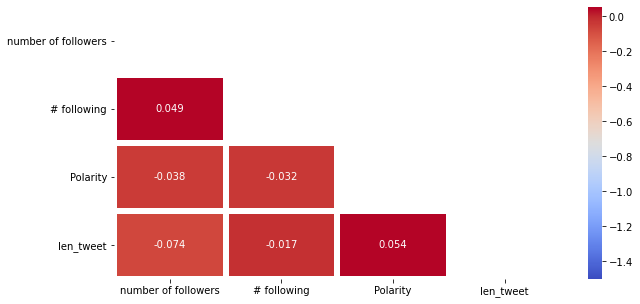

In [206]:
correlation = df[['number of followers','# following', 'Polarity', 'len_tweet']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 10}, linewidths=5, vmin=-1.5, mask=mask);

# Tweet created

In [207]:
df['tweet created'] = [str(i).split(" ")[0] for i in df['tweet created']]
tweet_dates = df.groupby("tweet created")['tweet'].count().reset_index()
tweet_dates = tweet_dates.set_index('tweet created')

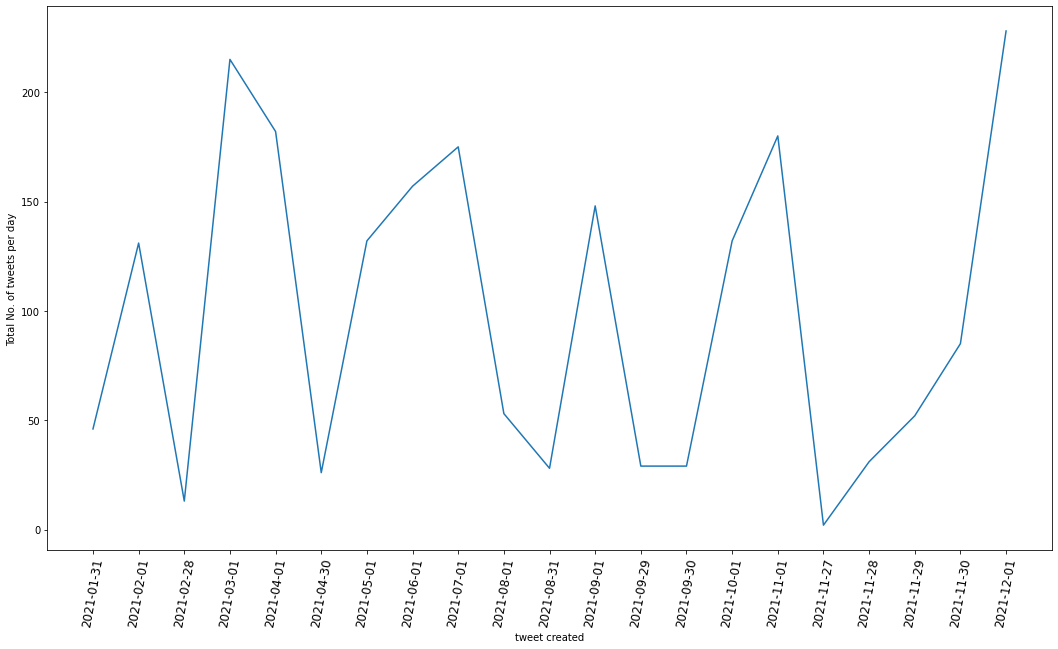

In [208]:
plt.figure(figsize=(18,10))
sns.lineplot(tweet_dates.index,tweet_dates['tweet'],palette='muted');
plt.xticks(rotation=80, fontsize=12);
plt.ylabel("Total No. of tweets per day");

In [209]:
hashtags = []
for i in df['hashtag']:
    hashtags.append(i[1:-1].split(",")[0].split(":")[-1].lower())

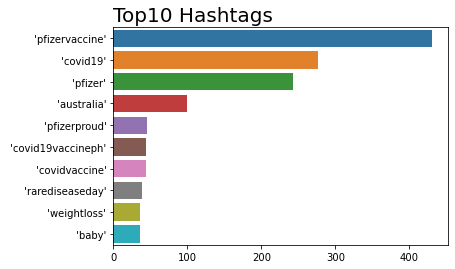

In [210]:
sns.barplot(y=pd.Series(hashtags).value_counts().head(10).index,
            x=pd.Series(hashtags).value_counts().head(10).values);
plt.title("Top10 Hashtags",fontdict={'size':20},loc='left');

In [211]:
df.to_csv('cleaned_data.csv')